In [26]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

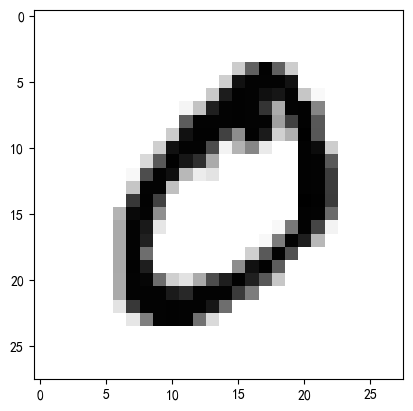

In [27]:
zero = plt.imread('./data/data/0/0_1.bmp')
plt.imshow(zero,cmap='gray')

In [28]:
zero

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 204,  96,   2,  96, 205, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 207,  17,   3,   3,   3,  18, 255, 255, 255, 255, 255, 255,
        255, 255],
       [25

In [29]:
zero.shape

(28, 28)

In [30]:
data = []
target = []
# 数字循环
for i in range(10):
    for j in range(1,501):
        temp = plt.imread(f'./data/data/{i}/{i}_{j}.bmp')
        data.append(temp)
        target.append(i)
        


In [31]:
len(data)

5000

In [32]:
len(target)

5000

In [33]:
# 训练之前一定要搞混论    考虑要不要混论

In [34]:
data

[array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 204,  96,   2,  96, 205, 255, 255, 255, 255, 255, 255,
         255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 207,  17,   3,   3,   3,  18, 255, 255, 255, 255, 255, 255,
         255

In [35]:
data = np.array(data)
data.shape

(5000, 28, 28)

In [36]:
data = data.reshape(5000,-1)

In [37]:
data.shape

(5000, 784)

In [38]:
target = np.array(target)

In [39]:
target

array([0, 0, 0, ..., 9, 9, 9])

In [40]:
# np.random.shuffle(data)
# np.random.shuffle(target)

In [41]:
target

array([0, 0, 0, ..., 9, 9, 9])

## 1.knn

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
# print()
print(np.sum(y_test == y_pred) / len(y_test))

0.934


In [43]:
knn.score(X_test,y_test)

0.934

In [44]:
y_pred[:10]

array([6, 9, 7, 6, 5, 7, 5, 2, 1, 1])

In [45]:
y_test[:10]

array([5, 9, 7, 6, 5, 7, 5, 2, 1, 1])

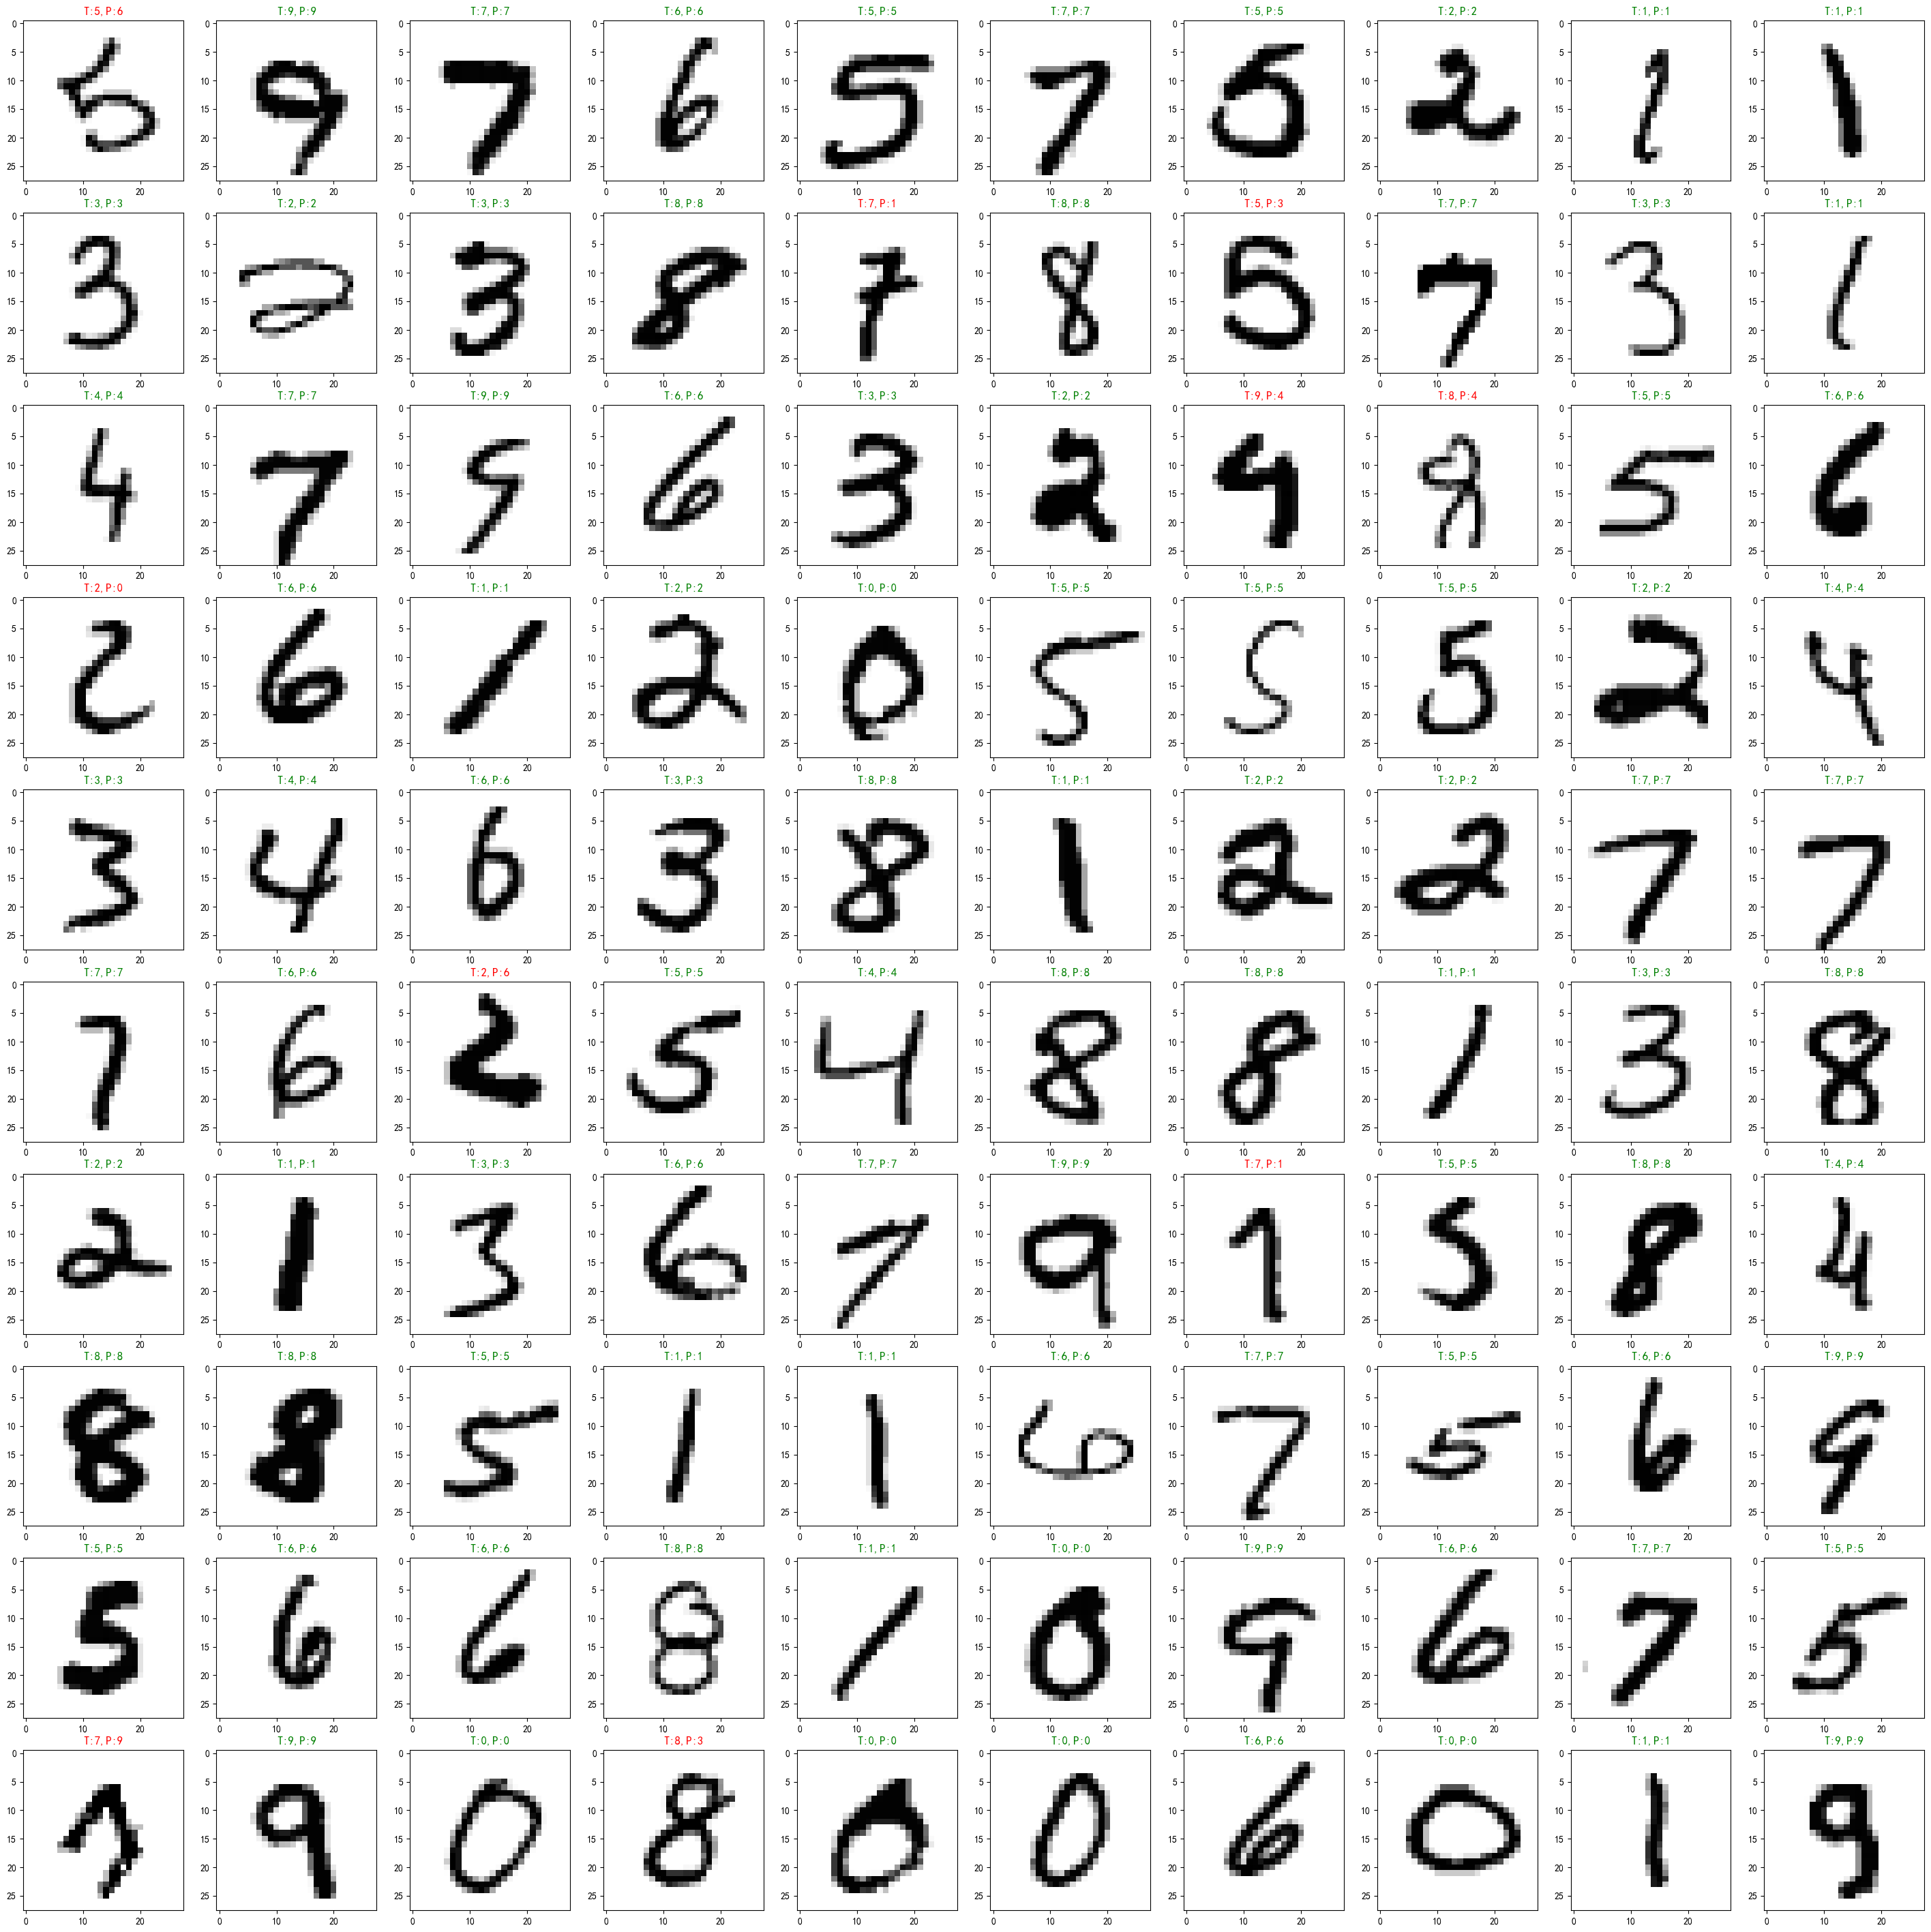

In [47]:
plt.figure(figsize=(36, 36))

for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title(
        f"T:{y_test[i]},P:{y_pred[i]}",
        color="green" if y_test[i] == y_pred[i] else "red",
    )

In [48]:
y_test

array([5, 9, 7, 6, 5, 7, 5, 2, 1, 1, 3, 2, 3, 8, 7, 8, 5, 7, 3, 1, 4, 7,
       9, 6, 3, 2, 9, 8, 5, 6, 2, 6, 1, 2, 0, 5, 5, 5, 2, 4, 3, 4, 6, 3,
       8, 1, 2, 2, 7, 7, 7, 6, 2, 5, 4, 8, 8, 1, 3, 8, 2, 1, 3, 6, 7, 9,
       7, 5, 8, 4, 8, 8, 5, 1, 1, 6, 7, 5, 6, 9, 5, 6, 6, 8, 1, 0, 9, 6,
       7, 5, 7, 9, 0, 8, 0, 0, 6, 0, 1, 9, 6, 3, 1, 4, 9, 6, 5, 3, 9, 3,
       1, 1, 9, 7, 7, 1, 7, 0, 2, 1, 9, 5, 3, 3, 7, 1, 8, 5, 5, 7, 5, 1,
       3, 7, 5, 1, 3, 2, 3, 7, 6, 5, 8, 7, 7, 5, 0, 8, 1, 4, 9, 3, 3, 3,
       4, 6, 4, 1, 2, 6, 0, 5, 3, 5, 3, 4, 4, 3, 5, 4, 8, 6, 4, 2, 3, 4,
       4, 1, 1, 5, 3, 1, 3, 3, 9, 4, 6, 4, 7, 6, 6, 9, 1, 8, 6, 9, 2, 2,
       3, 8, 5, 6, 0, 2, 3, 2, 9, 8, 9, 1, 6, 0, 5, 0, 8, 3, 8, 8, 7, 5,
       8, 2, 8, 4, 7, 5, 4, 9, 8, 0, 3, 2, 8, 0, 8, 1, 2, 1, 5, 6, 2, 8,
       0, 4, 2, 7, 9, 2, 8, 6, 2, 2, 6, 2, 7, 8, 8, 6, 3, 7, 4, 7, 1, 2,
       6, 9, 0, 3, 1, 2, 6, 8, 0, 5, 7, 4, 7, 5, 1, 7, 8, 5, 9, 8, 8, 4,
       1, 1, 1, 0, 8, 0, 3, 5, 2, 3, 5, 3, 5, 7, 1,

## 2.lg